In [ ]:
# prompt:
!pip install wget



  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=115a4195431d8e2eaec0816963a6c9df2d1fa6577742aa79067a12759854aaa1
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import pandas as pd

file_name = 'https://aka.ms/diabetes-data'

data = pd.read_csv(file_name)
data.head(6)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0


In [ ]:
for col_name in data.columns:
  print(col_name + ' : ', end=' ')
  print(data[col_name].value_counts().count())

PatientID :  9959
Pregnancies :  15
PlasmaGlucose :  149
DiastolicBloodPressure :  90
TricepsThickness :  66
SerumInsulin :  620
BMI :  10000
DiabetesPedigree :  10000
Age :  56
Diabetic :  2


In [ ]:
#to understand the data better
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               10000 non-null  int64  
 1   Pregnancies             10000 non-null  int64  
 2   PlasmaGlucose           10000 non-null  int64  
 3   DiastolicBloodPressure  10000 non-null  int64  
 4   TricepsThickness        10000 non-null  int64  
 5   SerumInsulin            10000 non-null  int64  
 6   BMI                     10000 non-null  float64
 7   DiabetesPedigree        10000 non-null  float64
 8   Age                     10000 non-null  int64  
 9   Diabetic                10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [ ]:
data.columns

In [ ]:
corrs = data.corr()
corrs

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,1.000000,0.004579,0.004778,0.015062,-0.003760,-0.028858,-0.005280,-0.021706,-0.010009,-0.021959
Pregnancies,0.004579,1.000000,0.055883,0.050251,0.059983,0.115830,0.098109,0.056039,0.144361,0.405161
PlasmaGlucose,0.004778,0.055883,1.000000,0.009093,0.026193,0.028525,0.022023,0.011044,0.036698,0.128800
DiastolicBloodPressure,0.015062,0.050251,0.009093,1.000000,0.002038,0.015653,0.016459,0.015617,0.042873,0.086689
TricepsThickness,-0.003760,0.059983,0.026193,0.002038,1.000000,0.019070,0.029941,-0.003498,0.067439,0.144062
SerumInsulin,-0.028858,0.115830,0.028525,0.015653,0.019070,1.000000,0.047509,0.043459,0.087223,0.244907
BMI,-0.005280,0.098109,0.022023,0.016459,0.029941,0.047509,1.000000,0.028719,0.062703,0.213245
DiabetesPedigree,-0.021706,0.056039,0.011044,0.015617,-0.003498,0.043459,0.028719,1.000000,0.059280,0.171613
Age,-0.010009,0.144361,0.036698,0.042873,0.067439,0.087223,0.062703,0.059280,1.000000,0.356701
Diabetic,-0.021959,0.405161,0.128800,0.086689,0.144062,0.244907,0.213245,0.171613,0.356701,1.000000


<Axes: >

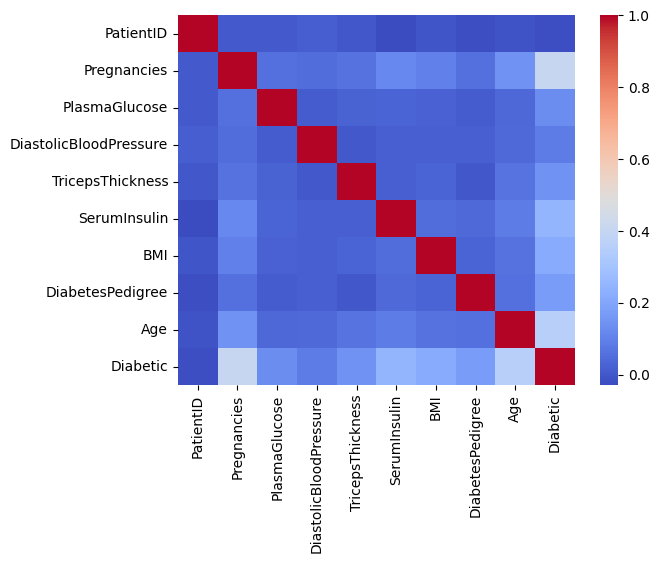

In [ ]:
import seaborn as sns
sns.heatmap(corrs, cmap='coolwarm')

In [ ]:
non_daibetics = (data['Diabetic'] == 0).sum()
non_daibetics


6656

In [ ]:
daibetics = (data['Diabetic'] == 1).sum()
daibetics

3344

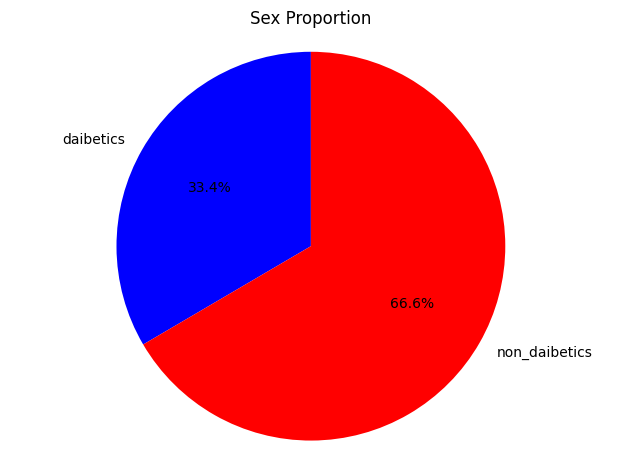

In [ ]:

# put them into a list called proportions
proportions = [daibetics, non_daibetics]

import matplotlib.pyplot as plt

# Create a pie chart
plt.pie(
    # using proportions
    proportions,

    # with the labels being officer names
    labels = ['daibetics', 'non_daibetics'],

    # with no shadows
    shadow = False,

    # with colors
    colors = ['blue','red'],


    # with the start angle at 90%
    startangle = 90,

    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )
# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

In [ ]:
data.set_index('PatientID')

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,0
1147438,8,92,93,47,36,21.240576,0.158365,23,0
1640031,7,115,47,52,35,41.511523,0.079019,23,0
1883350,9,103,78,25,304,29.582192,1.282870,43,1
1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...
1469198,6,95,85,37,267,18.497542,0.660240,31,0
1432736,0,55,51,7,50,21.865341,0.086589,34,0
1410962,5,99,59,47,67,30.774018,2.301594,43,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_to_scale = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data[columns_to_scale]


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0.000000,0.858108,0.602151,0.317647,0.011509,0.668950,0.510511,0.000000
1,0.571429,0.324324,0.741935,0.470588,0.028133,0.080345,0.036123,0.035714
2,0.500000,0.479730,0.247312,0.529412,0.026854,0.616134,0.000438,0.035714
3,0.642857,0.398649,0.580645,0.211765,0.370844,0.300826,0.541848,0.392857
4,0.071429,0.277027,0.376344,0.235294,0.026854,0.645024,0.212047,0.017857
...,...,...,...,...,...,...,...,...
9995,0.428571,0.344595,0.655914,0.352941,0.323529,0.007843,0.261832,0.178571
9996,0.000000,0.074324,0.290323,0.000000,0.046036,0.096859,0.003843,0.232143
9997,0.357143,0.371622,0.376344,0.470588,0.067775,0.332327,1.000000,0.392857
9998,0.000000,0.682432,0.462366,0.270588,0.008951,0.016151,0.319997,0.089286


In [ ]:
data[columns_to_scale].to_csv('', index=False)

In [ ]:
print("After Min-Max transform")
from google.colab import drive
drive.mount('/content/drive')
output_file_path = '/content/drive/scaled_data.csv'
data[columns_to_scale].to_csv(output_file_path, index=False)


After Min-Max transform
